In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = df.select_dtypes(exclude=['int', 'float']).columns
for col in cat:
    df[col] = le.fit_transform(df[col])

In [ ]:
import matplotlib.pyplot as  plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

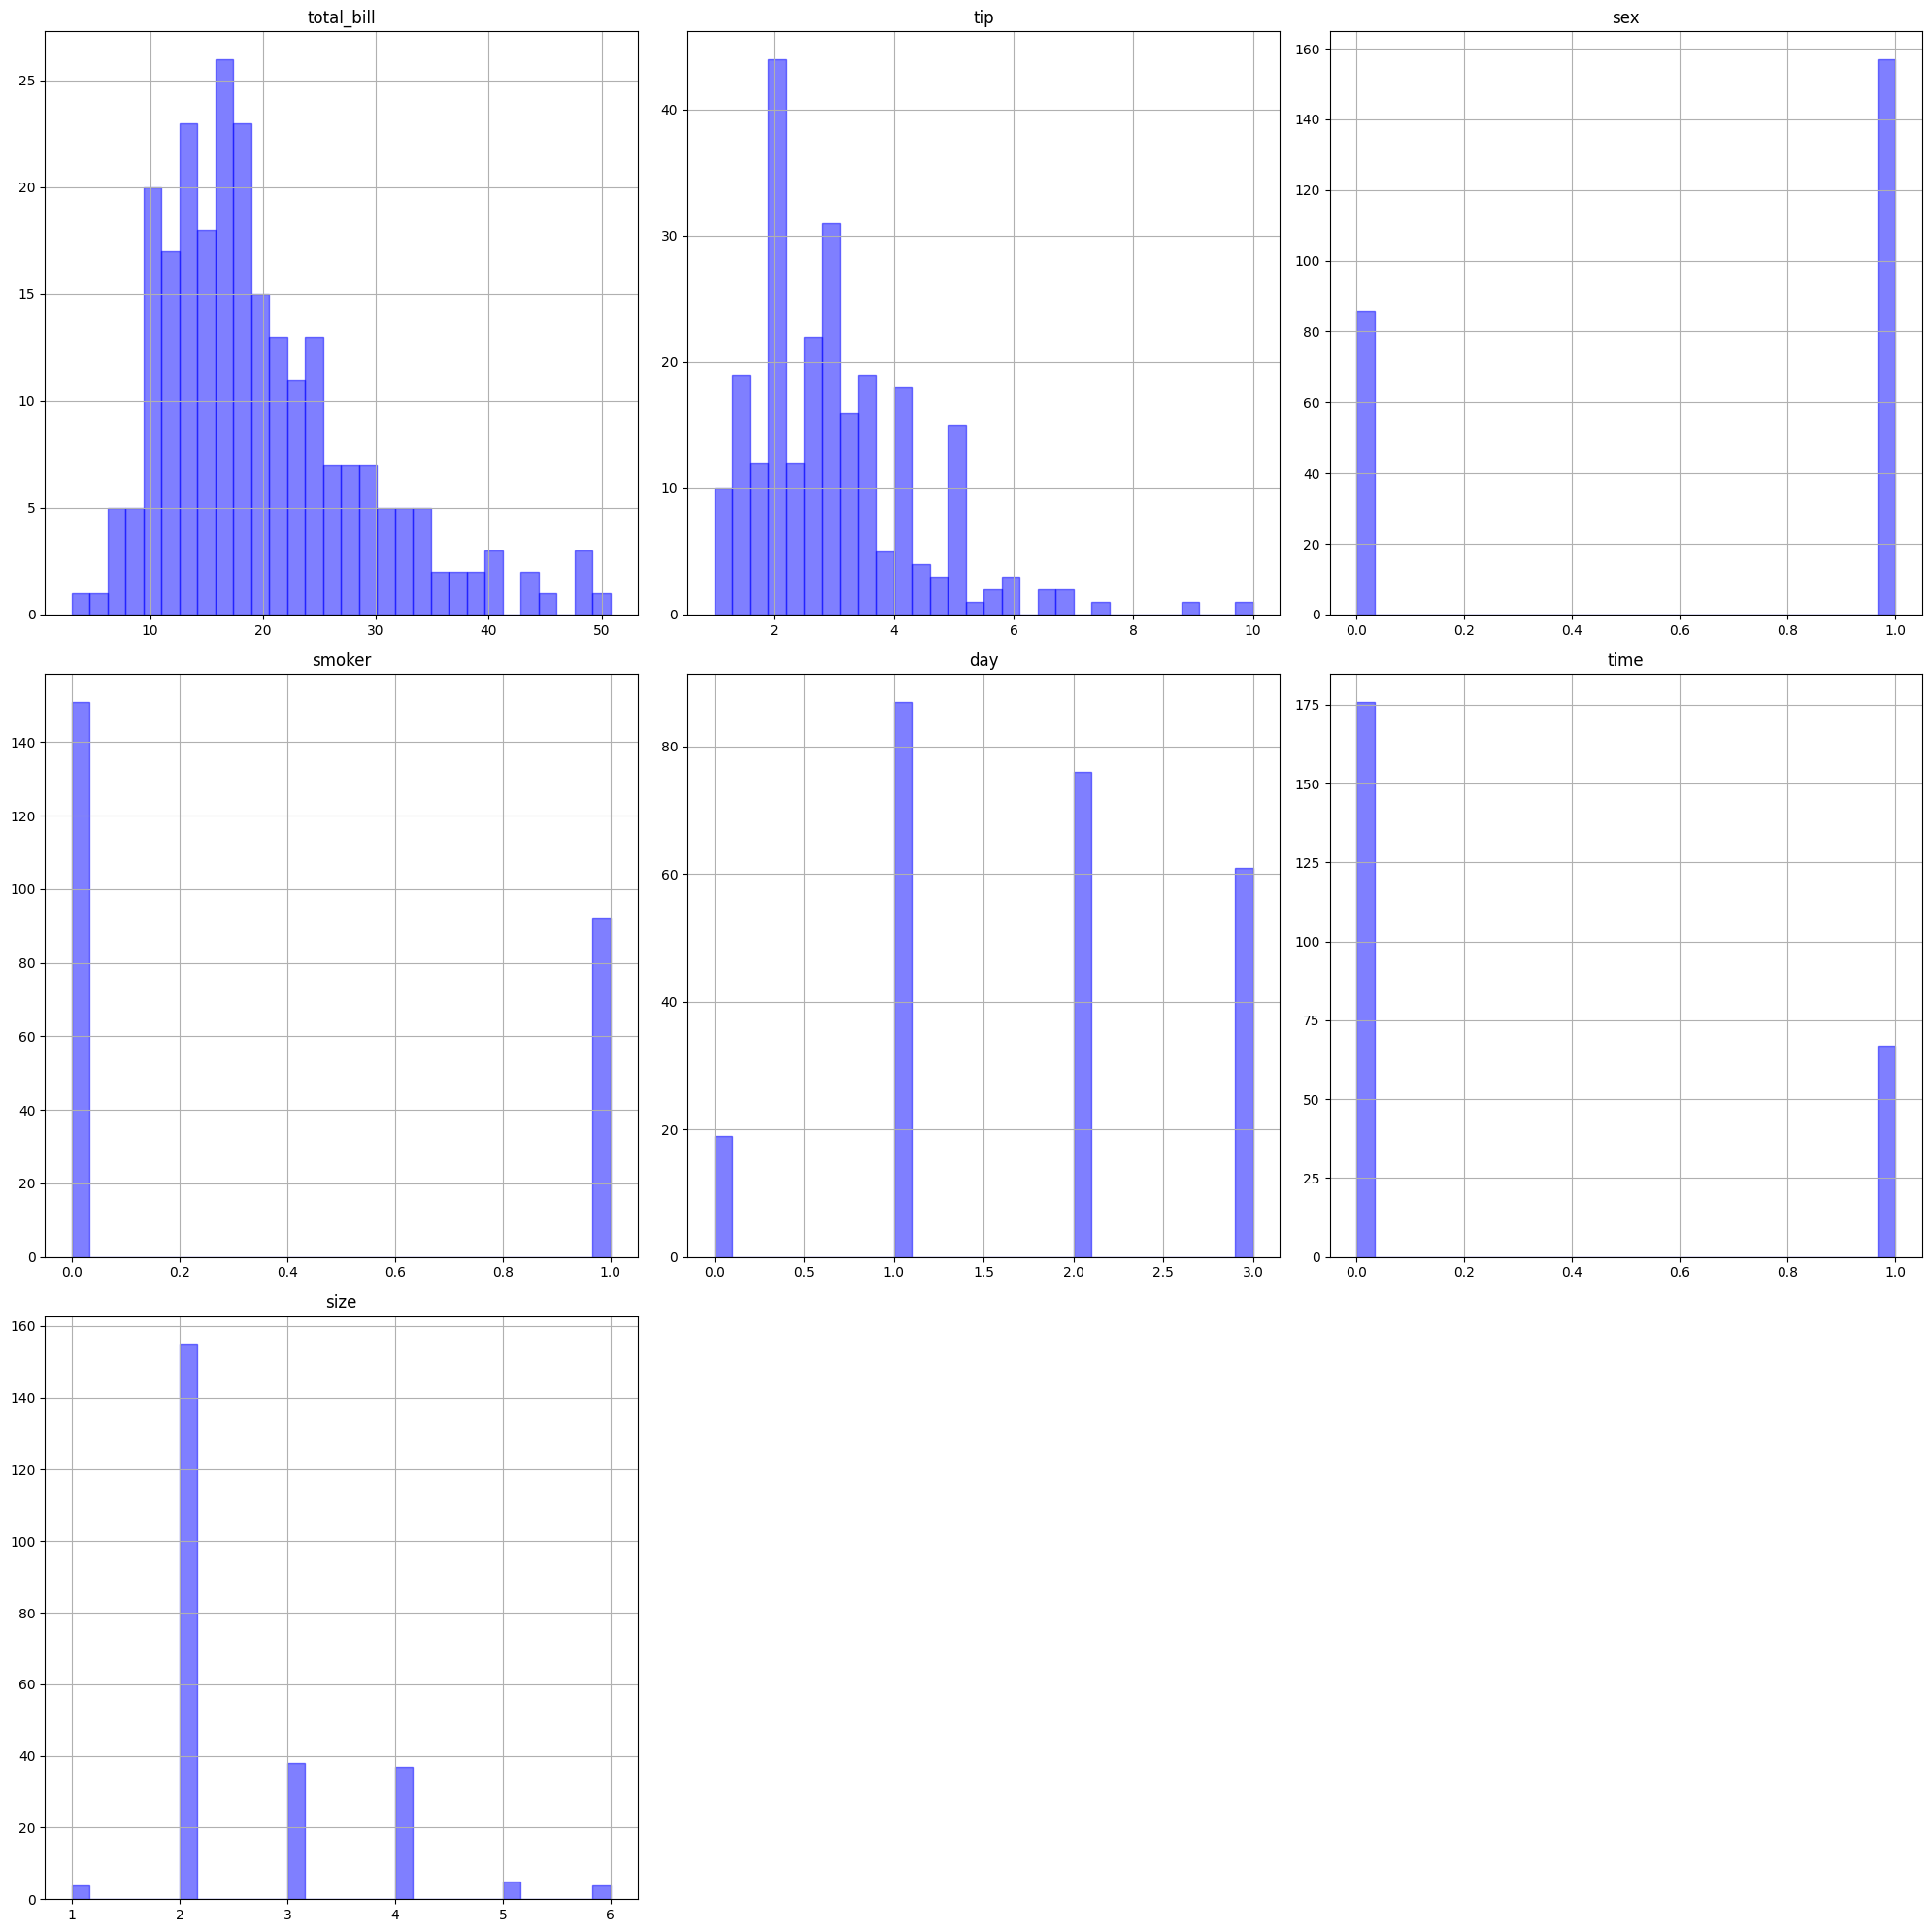

In [14]:
plt.figure(figsize=(10, 6))
df.hist(figsize=(20, 20), bins=30, color='blue', alpha=0.5,edgecolor='b')
plt.title('Histogram of numerical features')
plt.tight_layout()
plt.show()

In [15]:
X = df.drop('tip', axis=1)
y = df['tip']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [18]:
y_pred = svr.predict(X_test)
y_pred

array([2.80301879, 1.72049505, 2.74174005, 1.95217917, 3.8919549 ,
       3.85077674, 4.11701878, 2.21877682, 2.28552777, 3.14764924,
       2.61552192, 3.8504802 , 2.18815789, 5.80130033, 1.76703025,
       2.08621506, 3.88784892, 2.92483268, 2.61843609, 2.40845292,
       3.46316954, 3.10410561, 2.65447441, 1.83748034, 3.51032101,
       2.5361286 , 1.86151819, 3.31028173, 2.51155676, 4.50375162,
       1.53044013, 1.52900184, 3.06015582, 2.70889545, 2.84672487,
       1.71211106, 3.40971655, 1.74490855, 2.37366721, 2.93265217,
       1.92773516, 2.04461322, 4.6982011 , 2.22246243, 1.62185625,
       0.99914506, 4.323317  , 2.91983538, 4.46141178])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.1193624236980393
R^2 Score: 0.540581208598511


In [21]:
new_data = [[17, 1, 1, 2, 1, 0]]
new_pred = svr.predict(new_data)
print(f'Predicted tip for new data: {new_pred[0]}')

Predicted tip for new data: 1.9685965214365548
